In [46]:
# Superdense Coding
%matplotlib inline
from qiskit import *

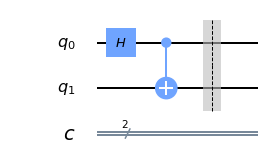

In [47]:
# Step 0: Prepare the Bell State
bell_circuit = QuantumCircuit(2, 2)
bell_circuit.h(0)
bell_circuit.cx(0, 1)
bell_circuit.barrier()
bell_circuit.draw(output="mpl")

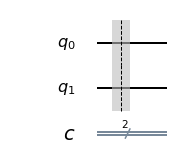

In [48]:
# Step 1: Prepare Alice circuits depending on b0b1

# Case 00: the circuit has no gates
alice_00 = QuantumCircuit(2, 2)
alice_00.barrier()
alice_00.draw(output="mpl")

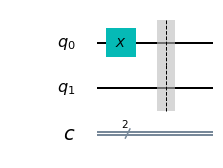

In [49]:
# Case 01: the circuit has the X gate
alice_01 = QuantumCircuit(2, 2)
alice_01.x(0)
alice_01.barrier()
alice_01.draw(output="mpl")

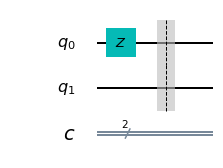

In [50]:
# Case 10: the circuit has the Z gate
alice_10 = QuantumCircuit(2, 2)
alice_10.z(0)
alice_10.barrier()
alice_10.draw(output="mpl")

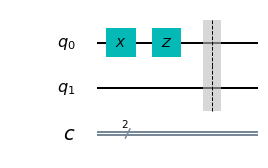

In [51]:
# Case 11: the circuit has the X gate and then Z gate
alice_11 = QuantumCircuit(2, 2)
alice_11.x(0)
alice_11.z(0)
alice_11.barrier()
alice_11.draw(output="mpl")

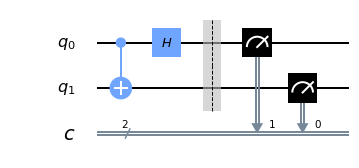

In [52]:
# Step 2: Apply the inverted entanglement circuit, and then measure
invert_circuit = QuantumCircuit(2, 2)
invert_circuit.cx(0, 1)
invert_circuit.h(0)
invert_circuit.barrier()
invert_circuit.measure([0, 1], [1, 0])  # Qiskit measures are always reversed, b1b0 not b0b1
invert_circuit.draw(output="mpl")

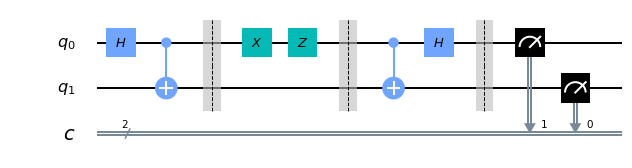

In [53]:
# When merged, the whole circuit looks like
(bell_circuit + alice_11 + invert_circuit).draw(output="mpl")

In [54]:
# Now we simulate each outcome, to do so we create an auxiliary function that runs it
def simulate_circuit(prep, encoding, decoding):
    """Returns the counts of the circuit that is combination of the three circuits"""
    circuit = prep + encoding + decoding
    simulator = Aer.get_backend("qasm_simulator")
    job = execute(circuit, simulator, shots = 2**16)
    result = job.result()
    count = result.get_counts()
    return count

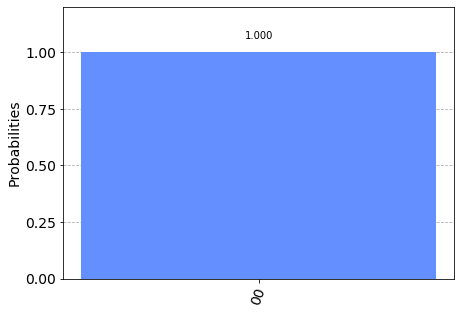

In [55]:
# For 00
count_00 = simulate_circuit(bell_circuit, alice_00, invert_circuit)
visualization.plot_histogram(count_00)

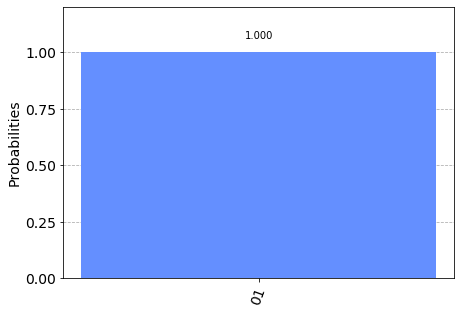

In [56]:
# For 01
count_01 = simulate_circuit(bell_circuit, alice_01, invert_circuit)
visualization.plot_histogram(count_01)

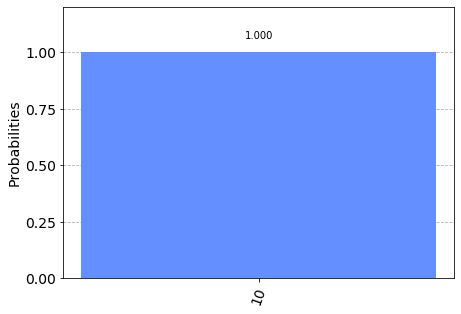

In [57]:
# For 10
count_10 = simulate_circuit(bell_circuit, alice_10, invert_circuit)
visualization.plot_histogram(count_10)

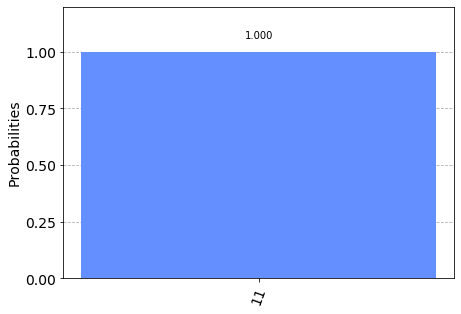

In [58]:
# For 11
count_11 = simulate_circuit(bell_circuit, alice_11, invert_circuit)
visualization.plot_histogram(count_11)

In [45]:
# The results match our predictions!
# For purposes of reproducibility, the Qiskit version is
qiskit.__qiskit_version__

{'qiskit-terra': '0.11.0',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.4',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.14.0'}